# Processamento Regional
Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

In [2]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.8
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [3]:
img = cv2.imread("dataset/cameraman.tif", 1)
n = noisy("s&p",img)
cv2.imwrite('dataset/noisy.tif',cv2.cvtColor(n,cv2.COLOR_BGR2GRAY))

True

In [4]:
def suavizacao(caminhos):
    
    fig, axes = plt.subplots(figsize=(8,3), dpi = 100, nrows=1, ncols=4)
    plt.tight_layout()

    start = caminhos[2]

    radio = widgets.RadioButtons(
        options=caminhos,
        value=start,
        description='Imagem: ',
        disabled=False
    )
    slider = IntSlider(min=3,max=17,step=2,value=7,description='Kernel')
    slider_std = IntSlider(min=0,max=10,step=1,value=0,description='DvPd')

    def update(args):
        path = args['new']
        img = cv2.cvtColor(cv2.imread(path,1),cv2.COLOR_BGR2RGB)
        media = cv2.blur(img,(slider.value,slider.value))
        mediana = cv2.medianBlur(img,slider.value)
        gaussiana = cv2.GaussianBlur(img,(slider.value,slider.value),slider_std.value)
        
        for ax in axes:
            ax.clear()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Original')
        axes[1].imshow(media, cmap='gray')
        axes[1].set_title('Media')
        axes[2].imshow(mediana, cmap='gray')
        axes[2].set_title('Mediana')
        axes[3].imshow(gaussiana, cmap='gray')
        axes[3].set_title('Gaussiana')
    
    def updateKernel(args):
        update({'new':radio.value})
            
    radio.observe(update, names='value');
    slider.observe(updateKernel, names='value')
    slider_std.observe(updateKernel, names='value')

    update({'new':start})
    display(radio);
    display(slider);
    display(slider_std);

<IPython.core.display.Javascript object>


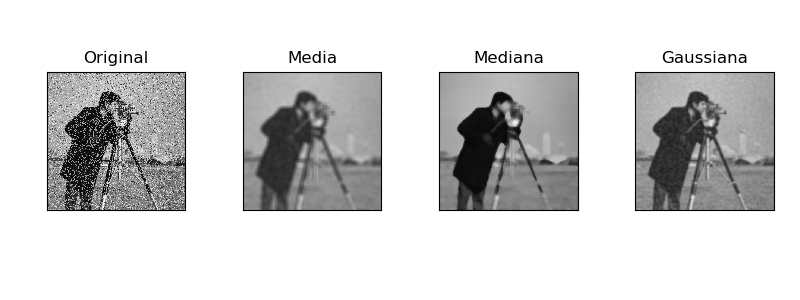

RadioButtons(description='Imagem: ', index=2, options=('dataset/cameraman.tif', 'dataset/lenna.png', 'dataset/…

IntSlider(value=7, description='Kernel', max=17, min=3, step=2)

IntSlider(value=0, description='DvPd', max=10)

In [5]:
suavizacao(['dataset/cameraman.tif','dataset/lenna.png','dataset/people_street.jpg','dataset/noisy.tif'])

In [6]:
def sharpening(caminhos):
    fig, axes = plt.subplots(figsize=(10,3), dpi = 100, nrows=1, ncols=3)
    start = caminhos[2]
    plt.tight_layout()

    radio = widgets.RadioButtons(
        options=caminhos,
        value=start,
        description='Imagem: ',
        disabled=False
    )
    slider = IntSlider(min=3,max=17,step=2,value=7,description='Kernel')
    
    def update(args):
        path = args['new']
        img = cv2.cvtColor(cv2.imread(path,1),cv2.COLOR_BGR2GRAY)
        media = cv2.blur(img,(slider.value,slider.value))
        residual = img - media.astype(np.int16)
        sharpen = img + residual
        sharpen = cv2.convertScaleAbs(sharpen)
        
        for ax in axes:
            ax.clear()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        axes[0].imshow(img, cmap='gray')        
        axes[0].set_title('Original')
        axes[1].imshow(residual, cmap='gray')
        axes[1].set_title('Residual')
        axes[2].imshow(sharpen, cmap='gray')
        axes[2].set_title('Sharpen')

    def updateKernel(args):
        update({'new':radio.value})
        
    radio.observe(update, names='value');
    slider.observe(updateKernel, names='value')

    update({'new':start})
    display(radio);
    display(slider);

<IPython.core.display.Javascript object>


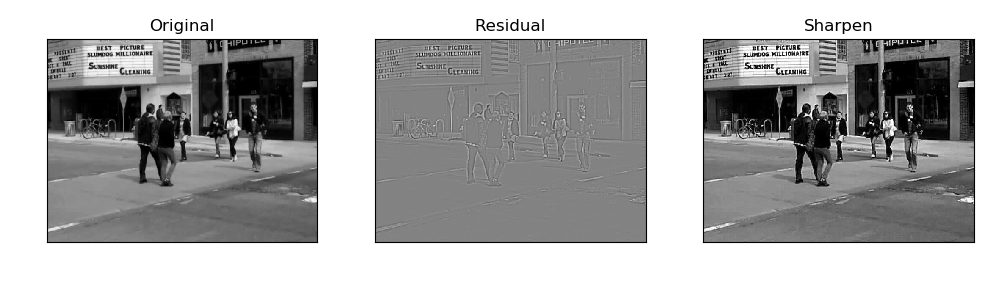

RadioButtons(description='Imagem: ', index=2, options=('dataset/cameraman.tif', 'dataset/lenna.png', 'dataset/…

IntSlider(value=7, description='Kernel', max=17, min=3, step=2)

In [7]:
sharpening(['dataset/cameraman.tif','dataset/lenna.png','dataset/people_street.jpg','dataset/peppers.tif', 'dataset/veropeso.jpg'])